In [1]:
import os
import cv2
import splitfolders as sf
import opendatasets as od
import load as ld
import pandas as pd
from sklearn.metrics import classification_report
from tensorflow.keras import datasets, layers, models
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
od.download("https://www.kaggle.com/datasets/maysee/mushrooms-classification-common-genuss-images")

In [ ]:
ld.split_data()

In [2]:
(train_images, train_labels), (test_images, test_labels) = ld.load_data()

loadingtrain
./Mushrooms/Mushrooms_data/train
['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Mushrooms', 'Russula', 'Suillus']
<class 'KeyError'> 'Mushrooms'
loadingtest
./Mushrooms/Mushrooms_data/test
['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Mushrooms', 'Russula', 'Suillus']
<class 'KeyError'> 'Mushrooms'


In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(5367, 32, 32, 3)
(5367,)
(679, 32, 32, 3)
(679,)


In [7]:
class_names = ['Boletus','Entoloma','Russula','Suillus','Lactarius','Amanita','Agaricus','Hygrocybe','Cortinarius']


_, train_count = np.unique(train_labels,return_counts=True)

df = pd.DataFrame(data = train_count)
# df = df.T
df['Index'] = class_names
df.columns = ['Train_labels','Name']
df



,Train_labels,Name
0,858,Boletus
1,291,Entoloma
2,918,Russula
3,248,Suillus
4,1250,Lactarius
5,600,Amanita
6,282,Agaricus
7,252,Hygrocybe
8,668,Cortinarius


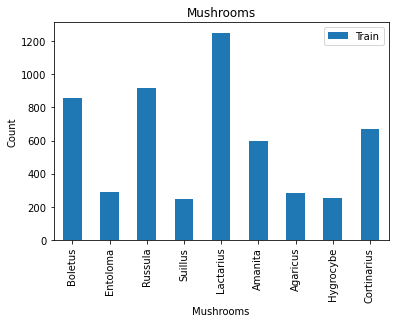

In [17]:
df.set_index("Name").plot.bar()
plt.xlabel("Mushrooms")
plt.ylabel("Count")
plt.title("Mushrooms");

Text(0.5, 1.0, 'train')

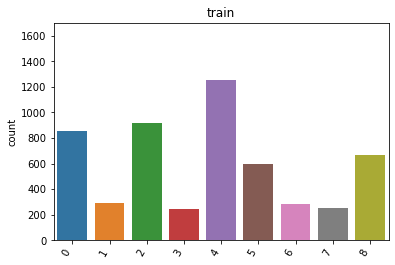

In [18]:
s = sns.countplot(train_labels)
plt.ylim(0,1700)
plt.xticks(s.get_xticks(), rotation=60, ha='right')
s.set_title("train")


In [19]:
index = 0
print(train_images[index])


[[[248. 251. 253.]
  [251. 250. 253.]
  [179. 194. 197.]
  ...
  [ 15.  46.  22.]
  [160. 196. 152.]
  [ 48.  81.  51.]]

 [[ 74. 106.  90.]
  [102. 166.  70.]
  [102. 167.  89.]
  ...
  [ 30.  65.  28.]
  [ 46.  83.  41.]
  [ 48.  94.  34.]]

 [[ 85. 108. 103.]
  [117. 181.  71.]
  [ 82. 143.  56.]
  ...
  [ 65.  97.  71.]
  [ 92. 136.  50.]
  [ 40.  73.  53.]]

 ...

 [[ 44.  44.  42.]
  [ 90.  97.  89.]
  [ 23.  34.  35.]
  ...
  [ 89.  79.  77.]
  [ 76. 108.  71.]
  [ 44.  37.  28.]]

 [[ 21.  23.  22.]
  [  2.   2.   3.]
  [ 34.  34.  36.]
  ...
  [ 27.  35.  37.]
  [ 66.  67.  61.]
  [ 11.  14.  10.]]

 [[ 34.  34.  36.]
  [ 35.  39.  38.]
  [ 26.  30.  31.]
  ...
  [ 53.  41.  43.]
  [ 74.  80.  67.]
  [ 56.  49.  51.]]]


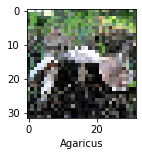

In [20]:
ld.plot_sample(train_images, train_labels, index)

In [21]:
train_images /= 255
test_images /= 255

In [22]:
print(train_images[0])

[[[0.97254902 0.98431373 0.99215686]
  [0.98431373 0.98039216 0.99215686]
  [0.70196078 0.76078431 0.77254902]
  ...
  [0.05882353 0.18039216 0.08627451]
  [0.62745098 0.76862745 0.59607843]
  [0.18823529 0.31764706 0.2       ]]

 [[0.29019608 0.41568627 0.35294118]
  [0.4        0.65098039 0.2745098 ]
  [0.4        0.65490196 0.34901961]
  ...
  [0.11764706 0.25490196 0.10980392]
  [0.18039216 0.3254902  0.16078431]
  [0.18823529 0.36862745 0.13333333]]

 [[0.33333333 0.42352941 0.40392157]
  [0.45882353 0.70980392 0.27843137]
  [0.32156863 0.56078431 0.21960784]
  ...
  [0.25490196 0.38039216 0.27843137]
  [0.36078431 0.53333333 0.19607843]
  [0.15686275 0.28627451 0.20784314]]

 ...

 [[0.17254902 0.17254902 0.16470588]
  [0.35294118 0.38039216 0.34901961]
  [0.09019608 0.13333333 0.1372549 ]
  ...
  [0.34901961 0.30980392 0.30196078]
  [0.29803922 0.42352941 0.27843137]
  [0.17254902 0.14509804 0.10980392]]

 [[0.08235294 0.09019608 0.08627451]
  [0.00784314 0.00784314 0.01176471]


In [23]:
cnn = models.Sequential([
          # cnn 
          layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
          layers.MaxPooling2D((2,2)),
   
      
          #dense
          layers.Flatten(),
          layers.Dense(1024, activation='relu'),
          layers.Dropout(0.5),
          layers.Dense(9, activation='softmax')
])

In [24]:
cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [25]:
history = cnn.fit(train_images, train_labels, epochs=10,batch_size = 35)

Epoch 1/10
154/154 [==============================] - 3s 17ms/step - loss: 1.9848 - accuracy: 0.2556
Epoch 2/10
154/154 [==============================] - 3s 16ms/step - loss: 1.8074 - accuracy: 0.3516
Epoch 3/10
154/154 [==============================] - 3s 17ms/step - loss: 1.6886 - accuracy: 0.4013
Epoch 4/10
154/154 [==============================] - 3s 16ms/step - loss: 1.6017 - accuracy: 0.4343
Epoch 5/10
154/154 [==============================] - 3s 17ms/step - loss: 1.5194 - accuracy: 0.4595
Epoch 6/10
154/154 [==============================] - 2s 16ms/step - loss: 1.4173 - accuracy: 0.4966
Epoch 7/10
154/154 [==============================] - 2s 16ms/step - loss: 1.3117 - accuracy: 0.5381
Epoch 8/10
154/154 [==============================] - 3s 16ms/step - loss: 1.1955 - accuracy: 0.5828
Epoch 9/10
154/154 [==============================] - 2s 16ms/step - loss: 1.0812 - accuracy: 0.6255
Epoch 10/10
154/154 [==============================] - 3s 16ms/step - loss: 0.9417 - accura

In [26]:
model_accuracy = cnn.evaluate(test_images, test_labels)[1]
print(model_accuracy*100, '%')

22/22 [==============================] - 0s 6ms/step - loss: 1.6976 - accuracy: 0.4300
43.004417419433594 %


In [27]:
cnn.save('model')

INFO:tensorflow:Assets written to: model/assets


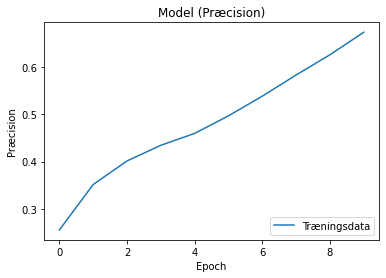

In [28]:
plt.plot(history.history['accuracy'])

plt.title('Model (Præcision)')
plt.ylabel('Præcision')
plt.xlabel('Epoch')
plt.legend(['Træningsdata'], loc='lower right')
plt.show()

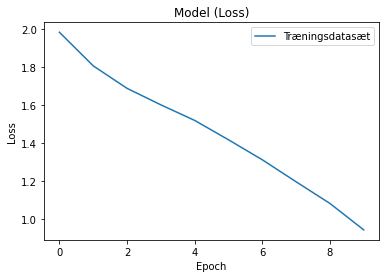

In [29]:
plt.plot(history.history['loss'])

plt.title('Model (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Træningsdatasæt'], loc='upper right')
plt.show()

In [30]:
pred = cnn.predict(test_images, batch_size=35)
pred = np.argmax(pred, axis=-1)

In [31]:
print(test_labels.shape)
print(pred.shape)


(679,)
(679,)


In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.61      0.71      0.66       108
           1       0.43      0.16      0.24        37
           2       0.43      0.37      0.40       116
           3       0.20      0.12      0.15        32
           4       0.45      0.60      0.51       157
           5       0.41      0.44      0.43        75
           6       0.16      0.31      0.21        36
           7       0.53      0.24      0.33        33
           8       0.34      0.19      0.24        85

    accuracy                           0.43       679
   macro avg       0.40      0.35      0.35       679
weighted avg       0.43      0.43      0.42       679

